In [ ]:
#Import data file and set directory

import zipfile
import os

# Unzip stock.zip into fintech_data directory
with zipfile.ZipFile('fintech.zip', 'r') as zip_ref:
    zip_ref.extractall('fintech_data')

# Verify the contents of the directory
os.listdir('fintech_data')

['data.csv']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load dataset
df = pd.read_csv('/content/fintech_data/data.csv')

# Step 1.1: Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Step 1.2: Drop columns with too many missing values or irrelevant features
df_cleaned = df.dropna(axis=1, thresh=len(df) * 0.8)  # Drop columns with more than 20% missing values

# Step 1.3: Handle missing values in remaining columns (e.g., fill with median)
df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Step 1.4: Remove outliers using z-score or other methods (optional)
# Instead of removing entire rows, cap the outliers to a specific z-score threshold
df_cleaned = df_cleaned.apply(lambda x: np.clip(x, -3, 3))

# Step 1.5: Scaling the data for better model performance
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Check cleaned data
df_scaled.head()

Missing values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,5.476811,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,...,-2.254317,-0.049725,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,5.476811,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,...,-0.309033,-0.055147,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,5.476811,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,...,-0.820510,0.136524,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,5.476811,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,...,-1.691222,-0.085827,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,5.476811,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,...,-0.316008,-0.082045,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715


In [ ]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
 

Bankrupt?
ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
Operating Gross Margin
Realized Sales Gross Margin
Operating Profit Rate
Pre-tax net Interest Rate
After-tax net Interest Rate
Non-industry income and expenditure/revenue
Continuous interest rate (after tax)
Operating Expense Rate
Research and development expense rate
Cash flow rate
Interest-bearing debt interest rate
Tax rate (A)
Net Value Per Share (B)
Net Value Per Share (A)
Net Value Per Share (C)
Persistent EPS in the Last Four Seasons
Cash Flow Per Share
Revenue Per Share (Yuan ¥)
Operating Profit Per Share (Yuan ¥)
Per Share Net profit before tax (Yuan ¥)
Realized Sales Gross Profit Growth Rate
Operating Profit Growth Rate
After-tax Net Profit Growth Rate
Regular Net Profit Growth Rate
Continuous Net Profit Growth Rate
Total Asset Growth Rate
Net Value Growth Rate
Total Asset Return Growth Rate Ratio
Cash Reinvestment %
Curren

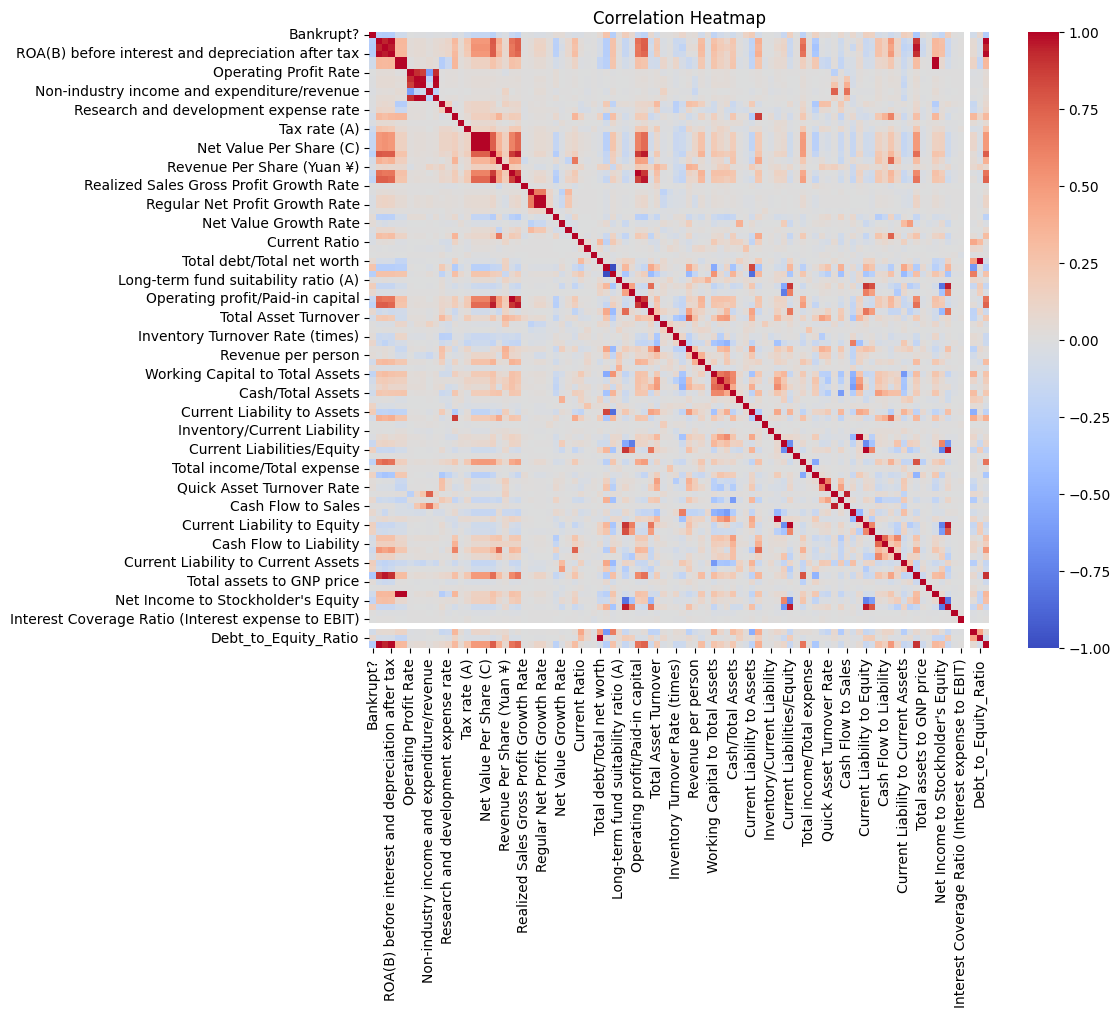

In [ ]:
# Step 3.1: Creating new features (e.g., ratios)
# Strip leading/trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

df_cleaned['Debt_to_Equity_Ratio'] = df_cleaned['Total debt/Total net worth'] / df_cleaned['Net worth/Assets']

# Print the exact column names to check for hidden characters
for col in df_cleaned.columns:
    print(col)

# Try accessing the column using its index to avoid potential name issues
try:
    net_profit_col_index = df_cleaned.columns.get_loc('Net profit before tax (Yuan ¥)')
    revenue_per_share_col_index = df_cleaned.columns.get_loc('Revenue Per Share (Yuan ¥)')

    # Replace infinite values with NaN
    df_cleaned['Profit_Margin'] = df_cleaned.iloc[:, net_profit_col_index] / df_cleaned.iloc[:, revenue_per_share_col_index]
    df_cleaned['Profit_Margin'].replace([np.inf, -np.inf], np.nan, inplace=True)
except KeyError:
    print("Column 'Net profit before tax (Yuan ¥)' or 'Revenue Per Share (Yuan ¥)' not found in the DataFrame.")

# Step 3.2: Log-transform skewed variables
df_cleaned['Log_ROA'] = np.log1p(df_cleaned['ROA(C) before interest and depreciation before interest'])

# Replace infinite values with NaN in the entire DataFrame
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3.3: Check correlation to understand relationships
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Impute NaN values with the median
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare target and features
X = df_cleaned.drop(columns=['Bankrupt?'])
y = df_cleaned['Bankrupt?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.91      0.20      0.32        51

    accuracy                           0.97      1364
   macro avg       0.94      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364

Accuracy: 0.969208211143695


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Target: Predict Operating Profit
X = df_cleaned.drop(columns=['Operating Profit Per Share (Yuan ¥)'])
y = df_cleaned['Operating Profit Per Share (Yuan ¥)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 6.03962693705307e-07


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


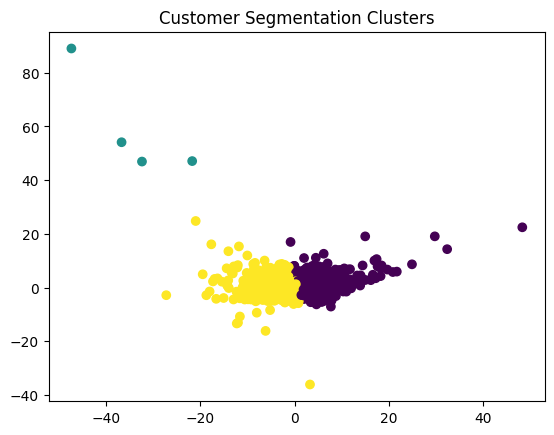

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce dimensions for clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_pca)

# Plot clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['Cluster'])
plt.title('Customer Segmentation Clusters')
plt.show()
